In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle as pkl
import json

In [6]:
data = pd.read_csv(r"..\dataset\cars_dataset.csv")
data

,Unnamed: 0,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,price
0,0,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,6300
1,1,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,2899
2,2,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,5350
3,3,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,25000
4,4,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,27700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left,7800
2495,2495,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left,9200
2496,2496,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left,9200
2497,2497,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left,9200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   brand         2499 non-null   object
 2   model         2499 non-null   object
 3   year          2499 non-null   int64 
 4   title_status  2499 non-null   object
 5   mileage       2499 non-null   int64 
 6   color         2499 non-null   object
 7   vin           2499 non-null   object
 8   lot           2499 non-null   int64 
 9   state         2499 non-null   object
 10  country       2499 non-null   object
 11  condition     2499 non-null   object
 12  price         2499 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


In [8]:
data.drop(columns = ["Unnamed: 0"],inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         2499 non-null   object
 1   model         2499 non-null   object
 2   year          2499 non-null   int64 
 3   title_status  2499 non-null   object
 4   mileage       2499 non-null   int64 
 5   color         2499 non-null   object
 6   vin           2499 non-null   object
 7   lot           2499 non-null   int64 
 8   state         2499 non-null   object
 9   country       2499 non-null   object
 10  condition     2499 non-null   object
 11  price         2499 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 234.4+ KB


In [10]:
data.describe()


,year,mileage,lot,price
count,2499.000000,2.499000e+03,2.499000e+03,2499.000000
mean,2016.714286,5.229869e+04,1.676914e+08,18767.671469
std,3.442656,5.970552e+04,2.038772e+05,12116.094936
min,1973.000000,0.000000e+00,1.593488e+08,0.000000
25%,2016.000000,2.146650e+04,1.676253e+08,10200.000000
50%,2018.000000,3.536500e+04,1.677451e+08,16900.000000
75%,2019.000000,6.347250e+04,1.677798e+08,25555.500000
max,2020.000000,1.017936e+06,1.678055e+08,84900.000000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'lot'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

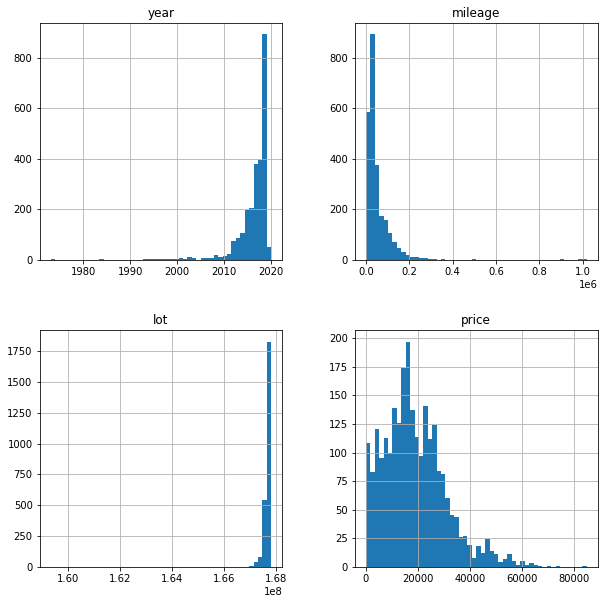

In [11]:
%matplotlib inline
data.hist(figsize = (10,10),bins = 50)

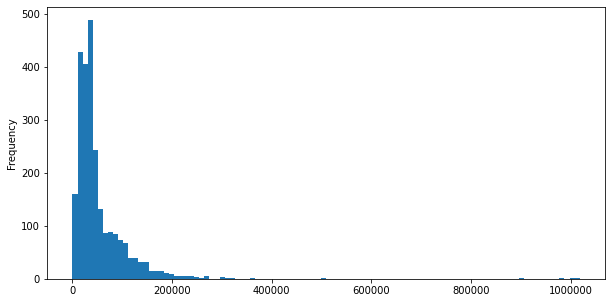

In [12]:
plt.ticklabel_format(useOffset=False,style = "plain",axis = "x")
#list_x = np.arange(0,300000,100000)
#plt.xticks(list_x)
data["mileage"].plot(kind = "hist",bins = 100,figsize = (10,5))
plt.show()

# Preparing training and testing datasets

In [13]:
train_set,test_set = train_test_split(data, test_size = 0.2,random_state = 42)

In [14]:
data["mileage_driven"] = pd.cut(data["mileage"],
                                bins =[0,20000,40000,60000,80000,100000,np.inf],
                               ).astype(str)


<AxesSubplot:>

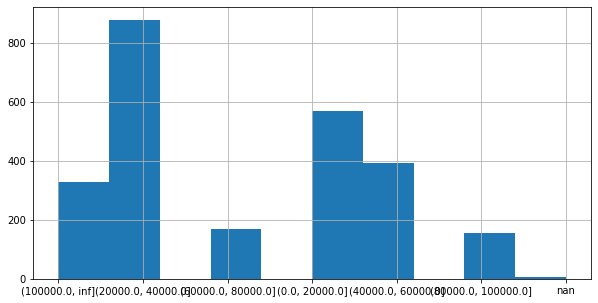

In [15]:
plt.figure(figsize = (10,5))

data["mileage_driven"].hist()

In [16]:
data["mileage_driven"].value_counts()

(20000.0, 40000.0]     878
(0.0, 20000.0]         569
(40000.0, 60000.0]     392
(100000.0, inf]        327
(60000.0, 80000.0]     170
(80000.0, 100000.0]    157
nan                      6
Name: mileage_driven, dtype: int64

In [17]:
"""
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_set, train_set["mileage_driven"]):
strat_train_set = train_set.loc[train_index]
strat_test_set = train_set.loc[test_index]
"""

'\nfrom sklearn.model_selection import StratifiedShuffleSplit\nsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\nfor train_index, test_index in split.split(train_set, train_set["mileage_driven"]):\nstrat_train_set = train_set.loc[train_index]\nstrat_test_set = train_set.loc[test_index]\n'

In [18]:
#train_set["mileage_driven"].value_counts() / len(train_set)

In [19]:
#test_set["mileage_driven"].value_counts() / len(test_set)

In [20]:
data.drop("mileage_driven", axis=1, inplace=True)

In [21]:
data

,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,price
0,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,6300
1,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,2899
2,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,5350
3,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,25000
4,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,27700
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left,7800
2495,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left,9200
2496,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left,9200
2497,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left,9200


# Visualization

In [22]:
cars = train_set.copy()

In [23]:
cars

,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,price
109,dodge,durango,2018,clean vehicle,49496,white,1c4rdjdg2jc329601,167755496,south carolina,usa,21 hours left,23100
2296,nissan,versa,2018,clean vehicle,54692,white,3n1cn7ap5jl830774,167724488,california,usa,2 days left,8000
354,ford,pickup,2009,salvage insurance,180364,blue,1ftyr10d19pa60391,167360535,tennessee,usa,2 days left,0
266,chevrolet,malibu,2019,clean vehicle,15780,white,1g1zd5st5kf112138,167767034,washington,usa,2 days left,17100
2102,ford,f-150,2018,clean vehicle,69480,white,1ftex1cb2jkd88410,167572896,texas,usa,1 days left,16300
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,ford,fusion,2020,clean vehicle,23984,silver,3fa6p0cd0lr116667,167569992,virginia,usa,2 days left,20000
1095,dodge,caravan,2019,clean vehicle,6269,gray,2c4rdgcg0kr744767,167744806,pennsylvania,usa,3 days left,21000
1130,dodge,challenger,2019,clean vehicle,30279,red,2c3cdzbt8kh593686,167801947,north carolina,usa,2 days left,23300
1294,ford,transit,2019,clean vehicle,17541,white,1ftyr1ym0kka55674,167735037,michigan,usa,21 hours left,23200


In [24]:
cor = cars.corr()
cor["price"].sort_values()

mileage   -0.399538
lot        0.151435
year       0.405916
price      1.000000
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='mileage', ylabel='mileage'>,
        <AxesSubplot:xlabel='year', ylabel='mileage'>,
        <AxesSubplot:xlabel='price', ylabel='mileage'>],
       [<AxesSubplot:xlabel='mileage', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>],
       [<AxesSubplot:xlabel='mileage', ylabel='price'>,
        <AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

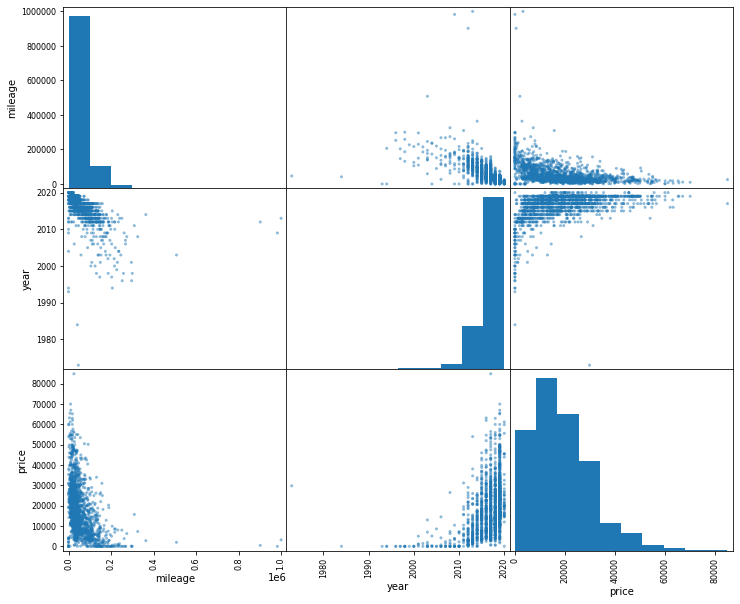

In [25]:
attr = ["mileage","year","price"]
scatter_matrix(cars[attr],figsize = (12,10))

<AxesSubplot:xlabel='mileage', ylabel='price'>

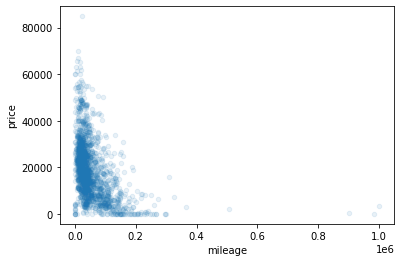

In [26]:
cars.plot(kind = "scatter",x = "mileage",y = "price",alpha = 0.1)

<AxesSubplot:xlabel='year', ylabel='price'>

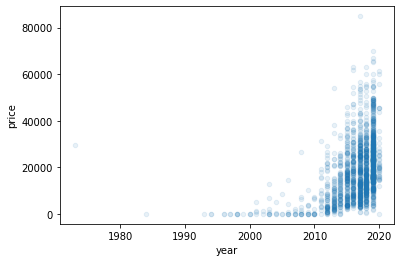

In [27]:
cars.plot(kind = "scatter",x = "year",y = "price",alpha = 0.1)

<AxesSubplot:xlabel='brand', ylabel='count'>

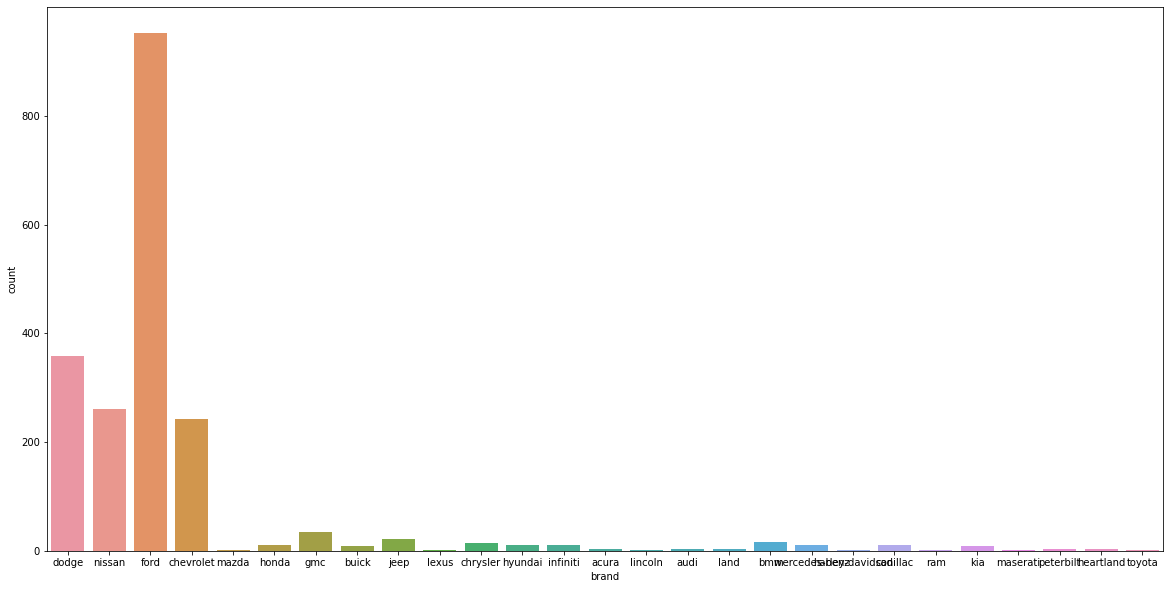

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(data = cars,x = "brand")


In [29]:
cars["brand"].value_counts()

ford               952
dodge              359
nissan             261
chevrolet          243
gmc                 35
jeep                21
bmw                 17
chrysler            15
infiniti            11
honda               10
mercedes-benz       10
hyundai             10
cadillac            10
buick                9
kia                  9
heartland            4
land                 4
peterbilt            3
acura                3
audi                 3
lincoln              2
lexus                2
mazda                2
harley-davidson      1
ram                  1
maserati             1
toyota               1
Name: brand, dtype: int64

<AxesSubplot:xlabel='title_status', ylabel='count'>

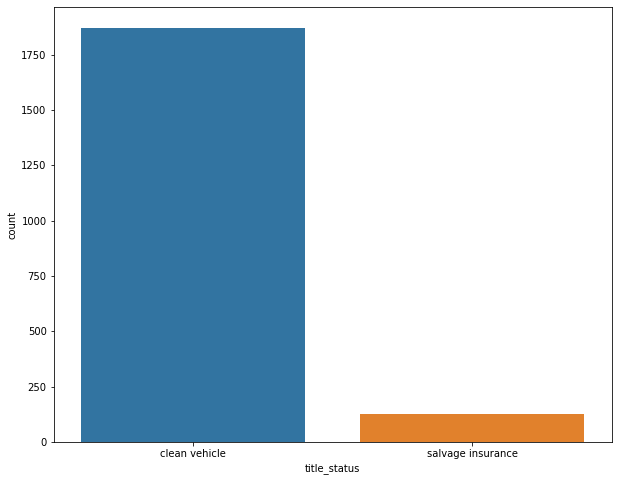

In [30]:
plt.figure(figsize = (10,8))
sns.countplot(data = cars,x = "title_status")

In [31]:
avg_price_by_state = cars.groupby("state")["price"].apply("mean")
avg_num_cars_by_state = cars["state"].value_counts()
cols = {
    "avg_price":avg_price_by_state,
    "avg_num_cars":avg_num_cars_by_state
}
pd.DataFrame(cols)

,avg_price,avg_num_cars
alabama,21378.846154,13
arizona,15703.703704,27
arkansas,3325.500000,10
california,17215.653595,153
colorado,10571.428571,14
connecticut,13642.200000,20
florida,14894.356436,202
georgia,16946.138889,36
idaho,11500.000000,2
illinois,25735.101010,99


# Preprocessing the data

In [32]:
temp = pd.Series(np.where(train_set["price"] > 0,">0 Price","==0 Price"))
prct = temp.value_counts()
prct

>0 Price     1965
==0 Price      34
dtype: int64

In [33]:
class null_price_drop(BaseEstimator,TransformerMixin):
    def __init__(self,data = None):
        self.column = data
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X,y = None):
        df = X.copy()
        df = df[df["price"]!= 0]
       
        return df
        
    
    def fit_transform(self,X,y = None):
        return self.fit(X,y).transform(X,y)

In [34]:
null_pipe = null_price_drop()
train_set = null_pipe.transform(train_set)
#train_set

In [35]:
#testing null_price_drop transformer
temp = pd.Series(np.where(train_set["price"] > 0,">0 Price","==0 Price"))
prct = temp.value_counts()
prct

>0 Price    1965
dtype: int64

In [36]:
class group_brand(BaseEstimator,TransformerMixin):
    def __init__(self,columns = None):
        self.columns = columns
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X,y = None):
        df = X.copy()
        brand_stat = df.groupby("brand")["brand"].agg("count")
        brand_less_10 = brand_stat[brand_stat < 10]
        df["brand"] = df["brand"].apply(lambda x:"other" if x in brand_less_10 else x)
        return df
    
    def fit_transform(self,X,y = None):
        return self.fit(X,y).transform(X,y)

In [37]:
# testing group_brand transformer
"""
grouping = group_brand()
cars_in_grouped = grouping.transform(cars_in)
cars_in_grouped["brand"].unique()
"""

'\ngrouping = group_brand()\ncars_in_grouped = grouping.transform(cars_in)\ncars_in_grouped["brand"].unique()\n'

In [38]:
#len(cars_in_grouped["brand"].unique())

In [39]:
grouping_and_null = Pipeline([
    ("dropping_null",null_price_drop()),
    ("grouping_brand",group_brand())
])

train_set = grouping_and_null.fit_transform(train_set)

In [40]:
train_set

,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,price
109,dodge,durango,2018,clean vehicle,49496,white,1c4rdjdg2jc329601,167755496,south carolina,usa,21 hours left,23100
2296,nissan,versa,2018,clean vehicle,54692,white,3n1cn7ap5jl830774,167724488,california,usa,2 days left,8000
266,chevrolet,malibu,2019,clean vehicle,15780,white,1g1zd5st5kf112138,167767034,washington,usa,2 days left,17100
2102,ford,f-150,2018,clean vehicle,69480,white,1ftex1cb2jkd88410,167572896,texas,usa,1 days left,16300
807,chevrolet,impala,2019,clean vehicle,34538,silver,2g11z5s37k9134455,167805500,indiana,usa,2 days left,18300
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,ford,fusion,2020,clean vehicle,23984,silver,3fa6p0cd0lr116667,167569992,virginia,usa,2 days left,20000
1095,dodge,caravan,2019,clean vehicle,6269,gray,2c4rdgcg0kr744767,167744806,pennsylvania,usa,3 days left,21000
1130,dodge,challenger,2019,clean vehicle,30279,red,2c3cdzbt8kh593686,167801947,north carolina,usa,2 days left,23300
1294,ford,transit,2019,clean vehicle,17541,white,1ftyr1ym0kka55674,167735037,michigan,usa,21 hours left,23200


### Splitting X and Y values

In [41]:
cars_in = train_set.drop("price",axis = 1)
cars_out = train_set[["price"]]

In [42]:
# Using the fit method to specify the columns to be dropped in the Custom Transformer
"""
class column_drop_transformer(BaseEstimator,TransformerMixin):
    def __init__(self,columns = None):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        self.columns = X
        return self 
        
    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
column_drop_pipeline = column_drop_transformer()
a = column_drop_pipeline.fit(["vin","lot","condition"])
cars_in_drop = column_drop_pipeline.transform(cars_in)
cars_in_drop
"""

'\nclass column_drop_transformer(BaseEstimator,TransformerMixin):\n    def __init__(self,columns = None):\n        self.columns=columns\n\n    def transform(self,X,y=None):\n        return X.drop(self.columns,axis=1)\n\n    def fit(self, X, y=None):\n        self.columns = X\n        return self \n        \n    def fit_transform(self,X,y=None):\n        return self.fit(X,y).transform(X)\n    \ncolumn_drop_pipeline = column_drop_transformer()\na = column_drop_pipeline.fit(["vin","lot","condition"])\ncars_in_drop = column_drop_pipeline.transform(cars_in)\ncars_in_drop\n'

In [43]:
class features_transformer(BaseEstimator,TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        """
        removing specified and remaining columns since ColumnTranformer "remainder = passthrough" will 
        duplicate the untouched columns(remaining columns) as this transformer is returning a DataFrame
        """
        remaining_columns = [col for col in X.columns if col not in self.columns]
        return pd.DataFrame(X.drop(columns= remaining_columns ))
        #return pd.DataFrame(X.drop(columns = self.columns,axis = 1))

    def fit(self, X, y=None):
       return self 

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [44]:
cars_in

,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
109,dodge,durango,2018,clean vehicle,49496,white,1c4rdjdg2jc329601,167755496,south carolina,usa,21 hours left
2296,nissan,versa,2018,clean vehicle,54692,white,3n1cn7ap5jl830774,167724488,california,usa,2 days left
266,chevrolet,malibu,2019,clean vehicle,15780,white,1g1zd5st5kf112138,167767034,washington,usa,2 days left
2102,ford,f-150,2018,clean vehicle,69480,white,1ftex1cb2jkd88410,167572896,texas,usa,1 days left
807,chevrolet,impala,2019,clean vehicle,34538,silver,2g11z5s37k9134455,167805500,indiana,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...
1638,ford,fusion,2020,clean vehicle,23984,silver,3fa6p0cd0lr116667,167569992,virginia,usa,2 days left
1095,dodge,caravan,2019,clean vehicle,6269,gray,2c4rdgcg0kr744767,167744806,pennsylvania,usa,3 days left
1130,dodge,challenger,2019,clean vehicle,30279,red,2c3cdzbt8kh593686,167801947,north carolina,usa,2 days left
1294,ford,transit,2019,clean vehicle,17541,white,1ftyr1ym0kka55674,167735037,michigan,usa,21 hours left


In [45]:
#testing features_transformer
#features_pipeline = features_transformer(["state","model","color","vin","lot","country","condition"])
#cars_in_drop = features_pipeline.transform(cars_in_grouped)
#cars_in_drop

In [46]:
temp = pd.Series(np.where(train_set["mileage"] == 0,"== 0 Mileage",">0 Mileage"))
prct = temp.value_counts()
prct

>0 Mileage      1962
== 0 Mileage       3
dtype: int64

<AxesSubplot:>

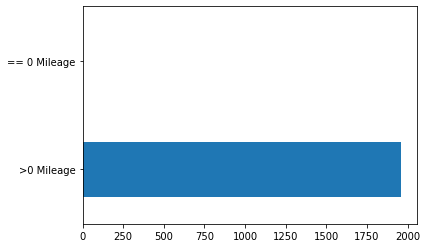

In [47]:
prct.plot(kind = "barh")

In [48]:
numerical_pipe = Pipeline([
    ('impute',SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])


In [49]:
one_hot = ["brand"]
ordinal = ["title_status"]

categorical_pipe = ColumnTransformer([
    ("one_hot",OneHotEncoder(sparse = False),one_hot),
    ("ordinal_enc",OrdinalEncoder(),ordinal),
])



In [50]:
#["brand","year","title_status","mileage"]
#["state","model","color","vin","lot","country","condition"]
cust_pipeline = Pipeline([
   
   ("column_drop",features_transformer(["brand","year","title_status","mileage"])),
])

In [51]:
#cars_in.columns.values.tolist()
cat = ["title_status","brand"]
num =  ["year","mileage"]

final_pipeline = ColumnTransformer([
    #("column_drop",column_drop_transformer(["state","model","color","vin","lot","country","condition"]),al),
    #("custom_trans",cust_pipeline,list(cars_in.columns)),
    ("num",numerical_pipe,num),
    ("cat",categorical_pipe,cat)
],remainder = 'drop')



In [52]:
#cars_in_drop = cust_pipeline.transform(cars_in)
cars_prepared = final_pipeline.fit_transform(cars_in)
cars_prepared

array([[ 0.35699108, -0.01105772,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35699108,  0.08740288,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.68866365, -0.64995254,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.68866365, -0.37520654,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68866365, -0.61658281,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35699108, -0.82110268,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [53]:
cars_prepared[0]

array([ 0.35699108, -0.01105772,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [54]:
cars_prepared.shape

(1965, 15)

In [55]:
cars_out.shape

(1965, 1)

# Training a Model

In [56]:
def display_scores(rmse_result):
   
    print("Scores : ",rmse_result)
    print("Mean : ",rmse_result.mean())
    print("SD : ",rmse_result.std())    

In [57]:
reg_model = LinearRegression()
reg_model.fit(cars_prepared,cars_out)

LinearRegression()

In [58]:
rand_data = cars_prepared[:5]
rand_data_out = cars_out[:5]
rand_pred = reg_model.predict(rand_data)
np.concatenate((rand_pred.reshape(-1,1),rand_data_out.values.reshape(-1,1)),1)

array([[18714.27960656, 23100.        ],
       [12111.58271843,  8000.        ],
       [25026.33765438, 17100.        ],
       [21685.48328393, 16300.        ],
       [24008.51902158, 18300.        ]])

In [59]:
cars_predicted_lin = reg_model.predict(cars_prepared)
mse_lin = mean_squared_error(cars_predicted_lin,cars_out)
rmse_lin = np.sqrt(mse_lin)
rmse_lin

9778.014701495424

In [60]:
tree_model = DecisionTreeRegressor()
tree_model.fit(cars_prepared,cars_out)


DecisionTreeRegressor()

In [61]:
cars_predicted_tree = tree_model.predict(cars_prepared)
mse_tree = mean_squared_error(cars_predicted_tree,cars_out)
rmse_tree = np.sqrt(mse_tree)
rmse_tree

437.80914195995837

In [62]:
random_forest = RandomForestRegressor(n_estimators = 100)
random_forest.fit(cars_prepared,cars_out)

C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_3900\1032108829.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(cars_prepared,cars_out)


RandomForestRegressor()

In [63]:
cars_predicted_forest = random_forest.predict(cars_prepared)
mse_rand_forest = mean_squared_error(cars_predicted_forest,cars_out)
rmse_forest = np.sqrt(mse_rand_forest)
rmse_forest

3773.2391966233467

In [119]:
poly_reg = PolynomialFeatures(degree = 2)
cars_prepared_poly = poly_reg.fit_transform(cars_prepared)

poly_lin = LinearRegression()
poly_lin.fit(cars_prepared_poly,cars_out)

LinearRegression()

In [122]:
cars_predicted_poly = poly_lin.predict(cars_prepared_poly)
mse_poly = mean_squared_error(cars_predicted_poly,cars_out)
rmse_poly = np.sqrt(mse_poly)
rmse_poly

9206.155240254551

In [64]:
lin_scores = cross_val_score(reg_model,
                            X = cars_prepared,
                            y = cars_out,
                            cv = 10,
                            scoring = "neg_mean_squared_error")

rmse_lin_scores = np.sqrt(-lin_scores) 
display_scores(rmse_lin_scores)
#lin_scores

Scores :  [ 9743.75419468 10291.62860088  9448.91679698  9911.97188605
  9511.0926787  10360.00220752 10107.02033697  9535.13606448
  9546.18862557 10667.34769588]
Mean :  9912.305908770155
SD :  404.0705090473878


In [65]:
tree_scores = cross_val_score(tree_model,
                              X = cars_prepared,
                              y = cars_out,
                              cv = 10,
                              scoring ="neg_mean_squared_error"
                             )
rmse_tree_scores = np.sqrt(-tree_scores)
display_scores(rmse_tree_scores)

Scores :  [11107.74162374 13324.87212289 13103.52176011 10996.86894963
 13301.45211931 13442.69347327 13491.8469814  11827.59808538
 12685.32834918 13313.69772268]
Mean :  12659.562118759863
SD :  930.1166599816136


In [66]:
forest_scores = cross_val_score(random_forest,
                              X = cars_prepared,
                              y = cars_out,
                              cv = 10,
                              scoring ="neg_mean_squared_error"
                             )
rmse_forest_scores = np.sqrt(-forest_scores)
display_scores(rmse_forest_scores)

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

Scores :  [ 9405.44508319  9894.23003596  9825.77082709  9646.6930509
 11094.02929556 10706.65537681 10251.42554258  9143.15351296
 10858.19474085 11138.63576122]
Mean :  10196.423322711775
SD :  682.6928635321507


In [125]:
poly_scores = cross_val_score(poly_lin,
                              X = cars_prepared_poly,
                              y = cars_out,
                              cv = 10,
                              scoring ="neg_mean_squared_error"
                             )
rmse_poly_scores = np.sqrt(-poly_scores)
display_scores(rmse_poly_scores)

Scores :  [9.42828165e+03 9.59535894e+03 2.28282215e+10 1.06635826e+04
 8.20375496e+12 1.00296065e+04 9.82396601e+03 8.69495683e+03
 9.49492495e+03 3.15281459e+11]
Mean :  854186470578.8938
SD :  2451635651184.6763


# Fine tuning the best model

In [67]:
forest_param = [
    {"n_estimators":[60,90,120,150,200],"max_features":[1,2,3]},
    {"n_estimators":[60,90,120,150,200],"bootstrap":[False],"max_features":[1,2,3]}
]

forest_grid = GridSearchCV(random_forest,
                           param_grid = forest_param,
                           scoring = "neg_mean_squared_error",
                          cv = 10)

forest_grid.fit(cars_prepared,cars_out)

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Python3101\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

C:\Python3101\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [1, 2, 3],
                          'n_estimators': [60, 90, 120, 150, 200]},
                         {'bootstrap': [False], 'max_features': [1, 2, 3],
                          'n_estimators': [60, 90, 120, 150, 200]}],
             scoring='neg_mean_squared_error')

In [68]:
forest_grid.best_params_ , np.sqrt(-forest_grid.best_score_)

({'max_features': 3, 'n_estimators': 150}, 10364.091694388933)

In [69]:
scores = forest_grid.cv_results_
for score,params in zip(scores["mean_test_score"],scores["params"]):
    print(np.sqrt(-score),params)

10422.738463683525 {'max_features': 1, 'n_estimators': 60}
10399.394553852246 {'max_features': 1, 'n_estimators': 90}
10418.806788720422 {'max_features': 1, 'n_estimators': 120}
10435.647097070707 {'max_features': 1, 'n_estimators': 150}
10401.879375413728 {'max_features': 1, 'n_estimators': 200}
10412.440880159185 {'max_features': 2, 'n_estimators': 60}
10433.78614831131 {'max_features': 2, 'n_estimators': 90}
10401.649232927088 {'max_features': 2, 'n_estimators': 120}
10427.952742814297 {'max_features': 2, 'n_estimators': 150}
10416.685533056578 {'max_features': 2, 'n_estimators': 200}
10397.896244877471 {'max_features': 3, 'n_estimators': 60}
10364.748718748646 {'max_features': 3, 'n_estimators': 90}
10395.672315244266 {'max_features': 3, 'n_estimators': 120}
10364.091694388933 {'max_features': 3, 'n_estimators': 150}
10389.047795938599 {'max_features': 3, 'n_estimators': 200}
12080.730569429474 {'bootstrap': False, 'max_features': 1, 'n_estimators': 60}
12061.801532619542 {'bootstr

# Evaluation on test data

In [70]:
test_set = grouping_and_null.transform(test_set)

In [71]:
test_set

,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,price
2319,nissan,doors,2015,clean vehicle,37953,super black,1n4az0cp7fc314468,167654210,new york,usa,11 days left,11390
1865,ford,explorer,2019,clean vehicle,28922,gray,1fm5k7f81kgb41445,167801390,florida,usa,2 days left,27900
902,dodge,van,2013,salvage insurance,163260,red,2c4rdgbg8dr566594,167532547,tennessee,usa,15 hours left,2500
2240,nissan,sentra,2019,clean vehicle,31037,gray,3n1ab7ap4ky222670,167457191,arizona,usa,2 days left,10900
1285,ford,transit,2019,clean vehicle,13466,white,1ftyr1ym9kka55673,167735027,michigan,usa,21 hours left,23600
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,ford,doors,2015,clean vehicle,67091,black,2fmtk3ap9fbc28957,167565081,new jersey,usa,9 days left,17150
1860,ford,door,2017,clean vehicle,42291,black,1ftew1eg4hfa66124,167736241,tennessee,usa,21 hours left,29000
1862,ford,max,2019,clean vehicle,24869,red,1fmjk2at0kea45301,167615142,minnesota,usa,14 hours left,51000
1151,dodge,charger,2019,clean vehicle,17515,red,2c3cdxhg2kh608892,167750648,new mexico,usa,21 hours left,25300


In [72]:
x_test = test_set.drop("price",axis = 1)
y_test = test_set["price"]

In [73]:
#x_test_drop = cust_pipeline.transform(x_test)
x_test_developed = final_pipeline.transform(x_test)

In [74]:
x_test_developed, x_test_developed.shape 

(array([[-0.63802662, -0.22978956,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.68866365, -0.40092075,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-1.30137176,  2.14469121,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.68866365, -0.47772229,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.68866365, -0.61707549,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.68866365, -0.37014708,  0.        , ...,  0.        ,
          1.        ,  0.        ]]),
 (491, 15))

In [75]:
pred_x_test = reg_model.predict(x_test_developed)
mse_x_test = mean_squared_error(pred_x_test,y_test)


In [76]:
rmse_x_test = np.sqrt(mse_x_test)
rmse_x_test

10355.49873132529

# Creating pickle file and columns file

In [77]:
pkl.dump(reg_model,open("lin_model","wb"))

In [78]:
get_brand_cols = final_pipeline.named_transformers_["cat"].named_transformers_["one_hot"].get_feature_names_out()
get_status_cols = final_pipeline.named_transformers_["cat"].named_transformers_["ordinal_enc"].categories_
get_brand_cols,get_status_cols


(array(['brand_bmw', 'brand_chevrolet', 'brand_chrysler', 'brand_dodge',
        'brand_ford', 'brand_gmc', 'brand_hyundai', 'brand_infiniti',
        'brand_jeep', 'brand_mercedes-benz', 'brand_nissan', 'brand_other'],
       dtype=object),
 [array(['clean vehicle', 'salvage insurance'], dtype=object)])

In [79]:
brand_columns = {
    "columns": [col for col in get_brand_cols]
}

status_columns = {
    "columns":[col for col in get_status_cols[0]]
}
brand_columns["columns"],status_columns["columns"]


(['brand_bmw',
  'brand_chevrolet',
  'brand_chrysler',
  'brand_dodge',
  'brand_ford',
  'brand_gmc',
  'brand_hyundai',
  'brand_infiniti',
  'brand_jeep',
  'brand_mercedes-benz',
  'brand_nissan',
  'brand_other'],
 ['clean vehicle', 'salvage insurance'])

In [80]:

with open("brand_columns.json","w") as file:
    file.write(json.dumps(brand_columns["columns"]))

with open("status_columns.json","w") as file:
    file.write(json.dumps(status_columns["columns"]))


In [81]:
y_test.iloc[0]

11390

In [82]:
l = pd.DataFrame({
    "brand":["nissan"],
    "model":["doors"],
    "year":[2015],
    "title_status":["clean vehicle"],
    "mileage":[37953],
    "color" :["super black"],
    "vin":["1n4az0cp7fc314468"],
    
    "state":["new york"],
    "country":["usa"],
    "condition"  :["11 days left"]
})
user = final_pipeline.transform(l)
#final_pipeline.transform([a])
user

array([[-0.63802662, -0.22978956,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ]])

In [129]:
reg_model.predict(user)

array([[10576.12942826]])